# Purpose: Recommender System Online Courses

- Take a look at the data, perform the inital investigation, to find preliminary insights, such as patterns, check assumptions and with the help of summary statistics create graphical representations.
- Perform hypothesis testing, working on several hypothesis.


### Prepare the lab environment

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import ttest_ind, mannwhitneyu

%matplotlib inline

In [2]:
# Set the random state
rs = 42

- Load the datasets

In [4]:
courses_df = pd.read_csv("course_genre.csv")
courses_df.head(2)

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [5]:
rating_df = pd.read_csv("ratings.csv")
rating_df.head(2)

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3


- Check the columns of each dataset

In [6]:
courses_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [7]:
rating_df.columns

Index(['user', 'item', 'rating'], dtype='object')

- Check how many unique courses I have

In [9]:

unique_courses = courses_df.shape[0]
print("Number of Unique Courses: ", unique_courses)

Number of Unique Courses:  307


- Check the type of the data

In [10]:
courses_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [11]:
rating_df.dtypes

user       int64
item      object
rating     int64
dtype: object

- Basic summary of statistics for courses

In [14]:
courses_df.describe()

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.195440,0.091205,0.120521,0.182410,0.055375,0.224756,0.032573,0.123779,0.117264,0.013029,0.055375,0.254072,0.061889,0.013029
std,0.397186,0.288371,0.326102,0.386813,0.229083,0.418103,0.177807,0.329866,0.322260,0.113585,0.229083,0.436049,0.241348,0.113585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 
- Mean tells you the percentage of courses tagged with that genre (e.g., ~25% have BackendDev).
- Std Dev shows variation — closer to 0 means consistent tagging, closer to 0.5 means more variance.
- Max = 1, Min = 0 → All genres are binary flags.
- Most genres have median = 0 → Most courses don't belong to most genres.

In [15]:
courses_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

- The course <code>accelarating deeep learning with gpu </code> is associated with <code> Python </code>, <code> Machine Learning </code> and <code> Data Science </code>.

- The `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.

# Plot the first word cloud from the course titles

In [16]:
# Join all the titles values in one string, then make them a wordcloud from the big string.
titles = " ".join(title for title in courses_df['TITLE'].astype(str))

In [17]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [18]:
# Filter for common stopwords
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'basic',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'enabling',
 'end',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'getting started',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'introduction',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',


In [19]:
# Create an object Wordcloud and generate stop words from titles
wordcloud = WordCloud(stopwords=stopwords,
                       background_color="white",
                         width=800,
                          height=400)

In [21]:
# Generate the wordcloud by titles
wordcloud.generate(titles)

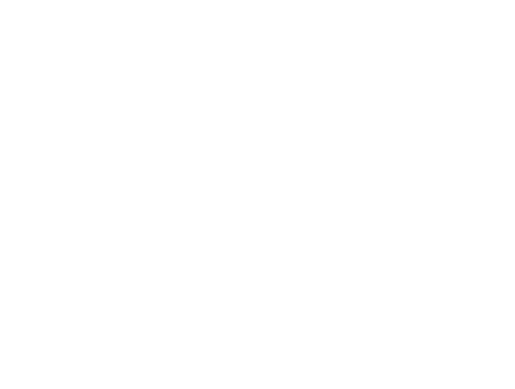

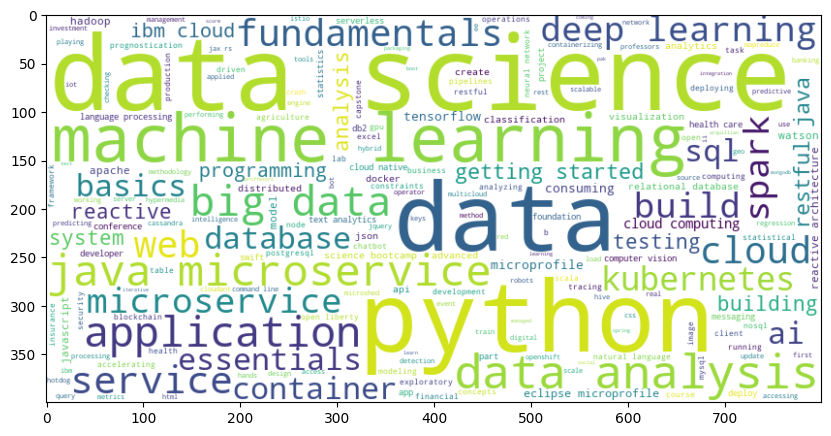

In [23]:
# Plot the wordcloud 
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(10,10))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

- From the wordcloud I can derive that the most important words are
- <code> Python </code>
- <code> Machine Learning </code>
- <code> Data Science </code>
- <code> Deep Learning </code>
- etc

# Analyze Course Genres

- Example_1: Find all the courses who are for machine learning and big data (my interest)

In [24]:
# Find all the indexes where the Machine Learning value equals 1 and Big Data equals 1
ml_bigdata_courses = courses_df[
    (courses_df['MachineLearning'] == 1) & (courses_df['BigData'] == 1)
]
ml_bigdata_courses.head(2)

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
46,GPXX0BUBEN,insurance risk assessment with montecarlo meth...,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59,TA0106EN,text analytics at scale,0,0,0,0,0,1,0,1,1,0,0,0,0,0


In [27]:
# Take the column headers from the second till the end
genres = courses_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

- Calculate the course count for each genre

In [30]:
genre_sums = courses_df[genres].sum(axis=0)
genre_df = pd.DataFrame(genre_sums, columns = ['Count']).sort_values(by = "Count", ascending=False)
genre_df

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


C:\Users\user\AppData\Local\Temp\ipykernel_2152\1069965169.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


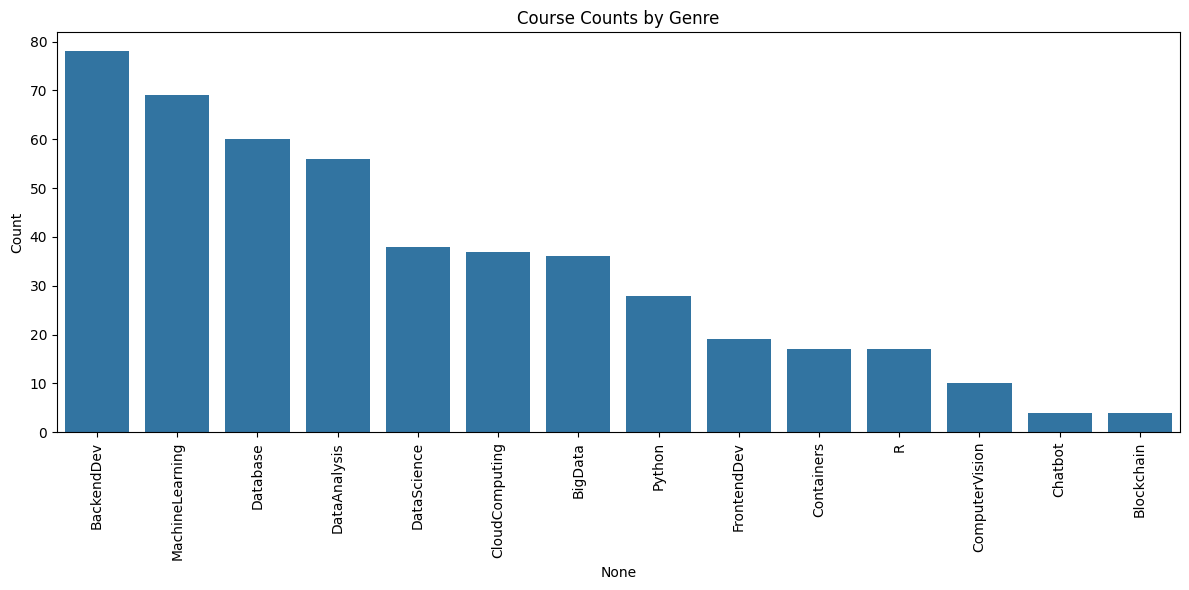

In [31]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(x=genre_df.index, y="Count", data=genre_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title("Course Counts by Genre")
plt.tight_layout()
plt.show()

- Analyze course enrollments

In [32]:
rating_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [33]:
rating_df['rating'].unique()

array([5, 3, 4])

The **rating** column consists of three potential values: 

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners. 

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements. 

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.

- Check how many ratings I have in the dataset

In [35]:
print("In the dataset the number of enrollments is: ",rating_df.shape[0] )

In the dataset the number of enrollments is:  233306


- Find the total number of users

In [36]:
# Count the number of rating by a user
rating_count_by_user = rating_df.groupby('user').size()

# Find the total number of users
total_users = rating_count_by_user.shape[0]

print("Total number of users:", total_users)

Total number of users: 33901


- Create a summary of statistics about the ratings the users give

In [37]:
# Count how many ratings each user gave
user_rating_counts = rating_df.groupby('user').size()

# Convert Series to DataFrame
user_rating_df = user_rating_counts.reset_index(name='rating_count')

# View summary statistics
summary_stats = user_rating_df['rating_count'].describe()

print(summary_stats)

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
Name: rating_count, dtype: float64


### Descriptive Statistics for User Course Ratings
| Statistic                           | Value  |
| ----------------------------------- | ------ |
| **Total Users** (count)             | 33,901 |
| **Average Ratings per User** (mean) | 6.88   |
| **Standard Deviation** (std)        | 5.82   |
| **Minimum Ratings Given** (min)     | 1      |
| **25th Percentile** (25%)           | 2      |
| **Median Ratings per User** (50%)   | 6      |
| **75th Percentile** (75%)           | 9      |
| **Maximum Ratings Given** (max)     | 61     |

### Results
- Most users rated between 2 and 9 courses.
- The average user rated about 7 courses.
- A few power users rated up to 61 courses, which is unusually high and could be useful for recommendation systems or analysis of engaged users.
- The spread (std ~5.8) suggests considerable variation in how active users are.

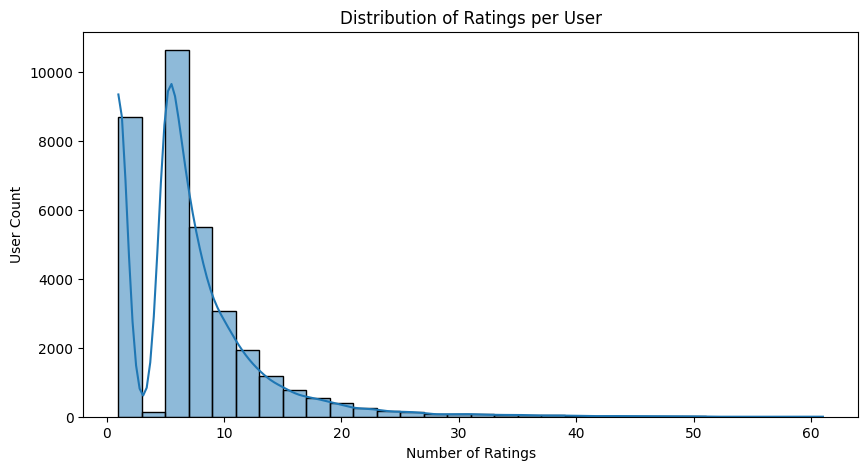

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(user_rating_df['rating_count'], bins=30, kde=True)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('User Count')
plt.show()

- Find the top 5 most popular courses

In [40]:
# Aggregate rating counts per item
item_rating_counts = rating_df.groupby('item').size()

# Convert to DataFrame (optional but recommended)
item_rating_df = item_rating_counts.reset_index(name='rating_count')

# Sort descending by rating count
top_items = item_rating_df.sort_values(by='rating_count', ascending=False)

# Slice top 20
top_20_courses = top_items[:5]

print(top_20_courses)

         item  rating_count
101  PY0101EN         14936
54   DS0101EN         14477
4    BD0101EN         13291
5    BD0111EN         10599
42   DA0101EN          8303


- For each genre find the average rating

In [41]:
merged_df = pd.merge(rating_df, courses_df, left_on='item', right_on='COURSE_ID', how='left')

In [43]:
merged_df.head(2)

,user,item,rating,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,1889878,CC0101EN,5,CC0101EN,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1342067,CL0101EN,3,CL0101EN,ibm cloud essentials,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# Take the genres
genres = courses_df.columns[2:]

# Find the genre average rating 
genre_avg_ratings = {}

# Iterate for each genre
for genre in genres:
    genre_avg_ratings[genre] = merged_df[merged_df[genre] == 1]['rating'].mean()

genre_avg_ratings


{'Database': np.float64(3.9971193481132525),
 'Python': np.float64(3.992376625015777),
 'CloudComputing': np.float64(4.000770896809955),
 'DataAnalysis': np.float64(3.996245518845073),
 'Containers': np.float64(4.008325214772828),
 'MachineLearning': np.float64(3.997643384440659),
 'ComputerVision': np.float64(3.9),
 'DataScience': np.float64(4.001164164284124),
 'BigData': np.float64(3.9961937844129927),
 'Chatbot': np.float64(3.9874804381846634),
 'R': np.float64(4.015691007845504),
 'BackendDev': np.float64(3.995056442195407),
 'FrontendDev': np.float64(3.9771205357142856),
 'Blockchain': np.float64(3.999391304347826)}

- I do not like this format

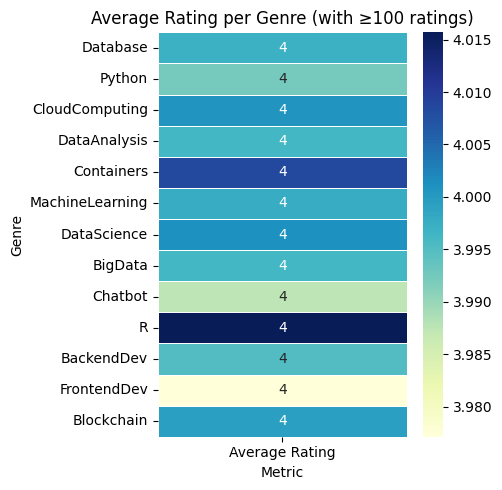

In [53]:
# Compute average rating and rating count per genre
genre_stats = []

# Iterate through each genere
for genre in genres:
    genre_data = merged_df[merged_df[genre] == 1]['rating'] # pick the genre column and slice the data
    average_rating = genre_data.mean() # find the mea
    rating_count = genre_data.count() # Fins the rating counts
    genre_stats.append({'Genre': genre, 'Average Rating': average_rating, 'Rating Count': rating_count})

# Convert to a dataframe
genre_stats_dataframe = pd.DataFrame(genre_stats)

# Filter genres with at least 100 ratings
genre_stats_filtered = genre_stats_dataframe[genre_stats_dataframe['Rating Count'] >= 100]

# Prepare data for heatmap
heatmap_data = genre_stats_filtered.set_index('Genre')[['Average Rating']]

# Plot the heatmap
plt.figure(figsize=(5,5 ))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5, cbar=True)
plt.title('Average Rating per Genre (with ≥100 ratings)')
plt.ylabel('Genre')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()


## Find the power users

In [54]:
user_rating_counts = rating_df.groupby('user').size().reset_index(name='rating_count')

In [55]:
# Find the power users, who rate more than others
# Let's define power users as those who are in the top 5% of rating counts
threshold = user_rating_counts['rating_count'].quantile(0.95)

# Create the power users variable
power_users = user_rating_counts[user_rating_counts['rating_count'] >= threshold]

print(f"Power user threshold: {threshold}")
print(f"Number of power users: {len(power_users)}")

Power user threshold: 17.0
Number of power users: 1972


- Power User threshold means that these users have rated more than 17 courses

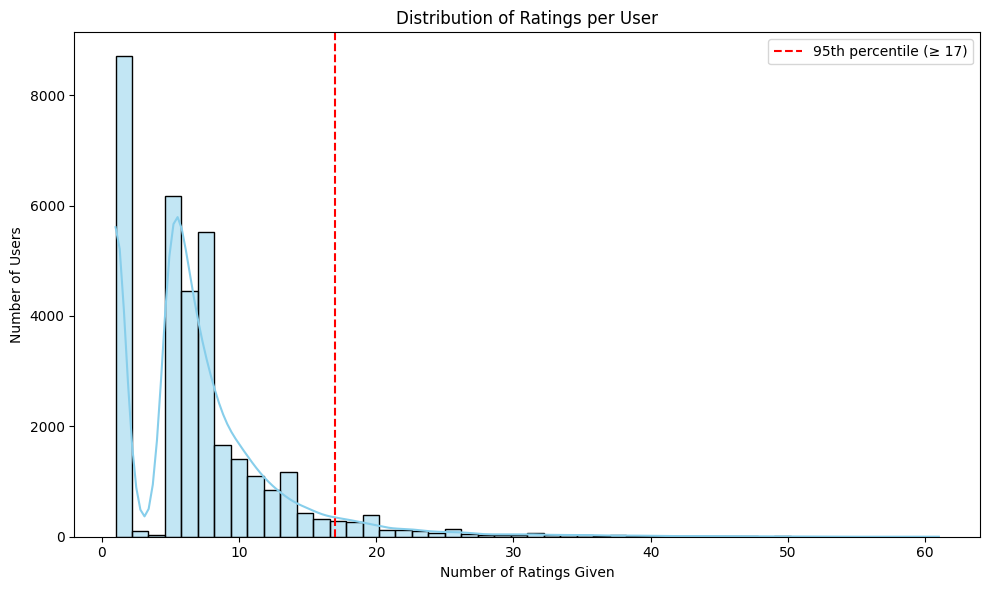

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts['rating_count'], bins=50, kde=True, color='skyblue')
plt.axvline(threshold, color='red', linestyle='--', label=f'95th percentile (≥ {int(threshold)})')
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings Given")
plt.ylabel("Number of Users")
plt.legend()
plt.tight_layout()
plt.show()

# Rating Distribution Histogram

In [57]:
# Step 1: Basic statistics
rating_summary = rating_df['rating'].describe()
print("Rating Summary:\n", rating_summary)

Rating Summary:
 count    233306.000000
mean          3.998448
std           0.816058
min           3.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


## Rating Summary Interpretation

| Metric           | Value   | Meaning                                            |
| ---------------- | ------- | -------------------------------------------------- |
| **Count**        | 233,306 | Total number of ratings in the dataset             |
| **Mean**         | \~4.00  | On average, users rate courses **very positively** |
| **Std Dev**      | \~0.82  | Low spread — most ratings are close to the average |
| **Min**          | 3.0     | Lowest possible rating recorded                    |
| **25%**          | 3.0     | 25% of ratings are 3                               |
| **50% (Median)** | 4.0     | Half of the ratings are **≤ 4**                    |
| **75%**          | 5.0     | 75% of the ratings are **≤ 5**                     |
| **Max**          | 5.0     | Highest rating recorded                            |


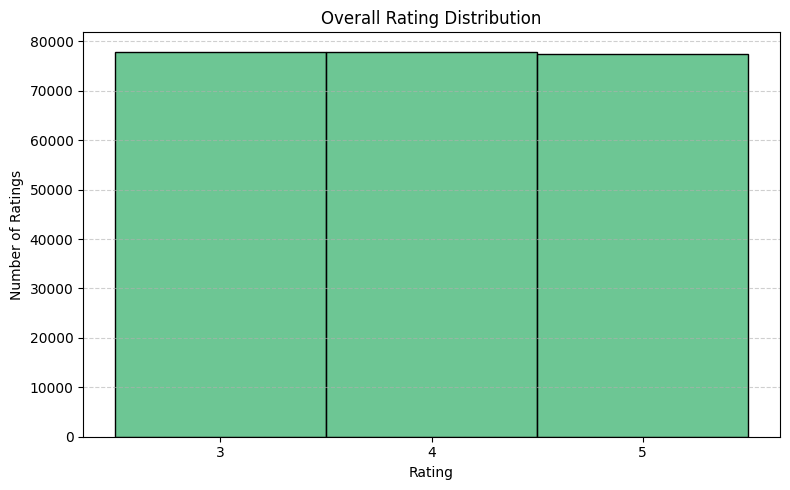

In [58]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(rating_df['rating'], bins=[2.5, 3.5, 4.5, 5.5], kde=False, color='mediumseagreen', edgecolor='black')
plt.xticks([3, 4, 5])
plt.title("Overall Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Key Insights
- The rating system is skewed toward higher values:
1. 75% of users rated 4 or higher.
2. Very few 3-star ratings → strong positive bias.

- This suggests users are either:
1. Generally satisfied with course content
2. The platform nudges them toward positive feedback (e.g., no option for 1 or 2).

# Hypothesis Testing

# Hypothesis Testing Part 1:
- "Machine Learning courses are rated higher than other courses."
- H₀ (null): Machine Learning course ratings are equal to or less than other courses.
- H₁ (alt): Machine Learning course ratings are higher.

In [61]:
# Group 1: Ratings of Machine Learning courses
ml_ratings = merged_df[merged_df['MachineLearning'] == 1]['rating']
ml_ratings.head()

2     5
23    4
26    3
31    5
39    4
Name: rating, dtype: int64

In [63]:
# Group 2: Ratings of all other courses
non_ml_ratings = merged_df[merged_df['MachineLearning'] == 0]['rating']
non_ml_ratings

0         5
1         3
3         5
4         3
5         5
         ..
233301    5
233302    5
233303    3
233304    4
233305    4
Name: rating, Length: 198086, dtype: int64

In [65]:
# Descriptive statistics
ml_mean = ml_ratings.mean()
non_ml_mean = non_ml_ratings.mean()

print("The average rating of courses that have to do with machine learning is: ", ml_mean)
print("The average rating of courses that have to do with other themas is: ", ml_mean)

The average rating of courses that have to do with machine learning is:  3.997643384440659
The average rating of courses that have to do with other themas is:  3.997643384440659


In [ ]:
# Independent Samples T-Test (one-tailed)
t_stat, t_p_value = ttest_ind(ml_ratings, non_ml_ratings, alternative='greater')
print("\n Independent T-Test (One-Tailed):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {t_p_value:.4f}")


📈 Independent T-Test (One-Tailed):
T-Statistic: -0.2009
P-Value: 0.5796


### Independent T-Test (One-Tailed)
 | Metric      | Value       |
| ----------- | ----------- |
| T-Statistic | **-0.2009** |
| P-Value     | **0.5796**  |
| Alpha (𝛼)  | 0.05        |

### Reach of Conclusion
- Since p-value (0.5796) > 0.05, we fail to reject the null hypothesis.
- The data does not provide statistically significant evidence that Machine Learning courses are rated higher than other courses.

In [69]:
# Mann-Whitney U Test (non-parametric)
u_stat, u_p_value = mannwhitneyu(ml_ratings, non_ml_ratings, alternative='greater')
print("\nMann-Whitney U Test (One-Tailed):")
print(f"U-Statistic: {u_stat:.4f}")
print(f"P-Value: {u_p_value:.4f}")


Mann-Whitney U Test (One-Tailed):
U-Statistic: 3486093037.0000
P-Value: 0.5795


### Mann-Whitney U Test (One-Tailed)

| Metric      | Value         |
| ----------- | ------------- |
| U-Statistic | 3,486,093,037 |
| P-Value     | **0.5795**    |
| Alpha (𝛼)  | 0.05          |

### Reach to conclusion
- Just like the t-test, since p-value > 0.05, we fail to reject the null hypothesis.
- There’s no statistically significant evidence that Machine Learning courses are rated higher than non-Machine Learning courses, even using a non-parametric test that doesn’t assume normal distribution.

In [70]:
# Conclusion by code
alpha = 0.05
if t_p_value < alpha:
    print("\nResult: Reject the null hypothesis — ML courses are rated higher.")
else:
    print("\nResult: Fail to reject the null hypothesis — No significant difference.")


Result: Fail to reject the null hypothesis — No significant difference.


# Hypothesis 2: 
- Hypothesis: "There is a positive correlation between course popularity and average rating."
- H₀: No correlation between number of ratings and average rating
- H₁: Positive correlation exists
- Test: Pearson or Spearman correlation


In [72]:
# Aggregate course popularity and average rating
course_stats = merged_df.groupby('COURSE_ID').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()
course_stats.head(2)

,COURSE_ID,rating_count,avg_rating
0,AI0111EN,383,3.890339
1,BC0101EN,6719,3.998661


In [73]:
from scipy.stats import pearsonr, spearmanr

In [75]:
# Calculate Pearson Correlation
pearson_corr, pearson_p = pearsonr(course_stats['rating_count'], course_stats['avg_rating'])

# Spearman correlation (measures rank-order relationship)
spearman_corr, spearman_p = spearmanr(course_stats['rating_count'], course_stats['avg_rating'])

In [77]:
# Print results
print("Pearson Correlation:")
print(f"  Correlation Coefficient: {pearson_corr:.4f}")
print(f"  P-Value: {pearson_p:.4f}")

print("\nSpearman Correlation:")
print(f"  Correlation Coefficient: {spearman_corr:.4f}")
print(f"  P-Value: {spearman_p:.4f}")

Pearson Correlation:
  Correlation Coefficient: -0.0406
  P-Value: 0.6518

Spearman Correlation:
  Correlation Coefficient: 0.1133
  P-Value: 0.2064


In [79]:
# Conclusion
alpha = 0.05
if pearson_p < alpha or spearman_p < alpha:
    print("\nResult: Significant correlation exists.")
else:
    print("\nResult: No significant correlation found between popularity and average rating.")


Result: No significant correlation found between popularity and average rating.


### Results
| Test         | Correlation | P-Value | Significance      |
| ------------ | ----------- | ------- | ----------------- |
| **Pearson**  | -0.0406     | 0.6518  | ❌ Not significant |
| **Spearman** | 0.1133      | 0.2064  | ❌ Not significant |

- You fail to reject the null hypothesis.
- There is no statistically significant correlation between how popular a course is and how highly it's rated.

### In fact:
- Pearson shows a weak negative linear relationship.
- Spearman shows a very weak positive rank correlation — but again, not significant.